# Assignment 7 computer data problem python 

We are here to predict the sales of the computer from the computer data provide, first understand the meaning of the data 
what it says, we have numerical data along with catagorical data , our intrest point here in this synario that 
we are more intrested in Price and its relation ship with othervaiabl and we cannot igonore catarogical variable and will make prediceiton

In [1]:
import pandas as pd

In [3]:
df  = pd.read_csv('Computer_Data.csv') # reading our data 

In [4]:
df.head() # we have unnamed index with 10 columns

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1


In [5]:
df.describe()

,Unnamed: 0,price,speed,hd,ram,screen,ads,trend
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,3130.000000,2219.576610,52.011024,416.601694,8.286947,14.608723,221.301007,15.926985
std,1806.961999,580.803956,21.157735,258.548445,5.631099,0.905115,74.835284,7.873984
min,1.000000,949.000000,25.000000,80.000000,2.000000,14.000000,39.000000,1.000000
25%,1565.500000,1794.000000,33.000000,214.000000,4.000000,14.000000,162.500000,10.000000
50%,3130.000000,2144.000000,50.000000,340.000000,8.000000,14.000000,246.000000,16.000000
75%,4694.500000,2595.000000,66.000000,528.000000,8.000000,15.000000,275.000000,21.500000
max,6259.000000,5399.000000,100.000000,2100.000000,32.000000,17.000000,339.000000,35.000000


## Playing With attribute of the data 

In [7]:
df.info() # 3 object type(catagorical data) data and rest are numeric type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6259 non-null   int64 
 1   price       6259 non-null   int64 
 2   speed       6259 non-null   int64 
 3   hd          6259 non-null   int64 
 4   ram         6259 non-null   int64 
 5   screen      6259 non-null   int64 
 6   cd          6259 non-null   object
 7   multi       6259 non-null   object
 8   premium     6259 non-null   object
 9   ads         6259 non-null   int64 
 10  trend       6259 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 538.0+ KB


# Data pre processing cleaning 

In [12]:
d = df.isna().sum() # precossec ther is no missing value 

In [13]:
d.head() # no missing value 

Unnamed: 0    0
price         0
speed         0
hd            0
ram           0
dtype: int64

In [14]:
df.corr() # found the corelation of each variable 

,Unnamed: 0,price,speed,hd,ram,screen,ads,trend
Unnamed: 0,1.000000,-0.199924,0.388566,0.555492,0.265376,0.184699,-0.272714,0.989818
price,-0.199924,1.000000,0.300976,0.430258,0.622748,0.296041,0.054540,-0.199987
speed,0.388566,0.300976,1.000000,0.372304,0.234760,0.189074,-0.215232,0.405438
hd,0.555492,0.430258,0.372304,1.000000,0.777726,0.232802,-0.323222,0.577790
ram,0.265376,0.622748,0.234760,0.777726,1.000000,0.208954,-0.181670,0.276844
screen,0.184699,0.296041,0.189074,0.232802,0.208954,1.000000,-0.093919,0.188614
ads,-0.272714,0.054540,-0.215232,-0.323222,-0.181670,-0.093919,1.000000,-0.318553
trend,0.989818,-0.199987,0.405438,0.577790,0.276844,0.188614,-0.318553,1.000000


## Lets do our feature visualisation from our data 

In [15]:
import seaborn as sns

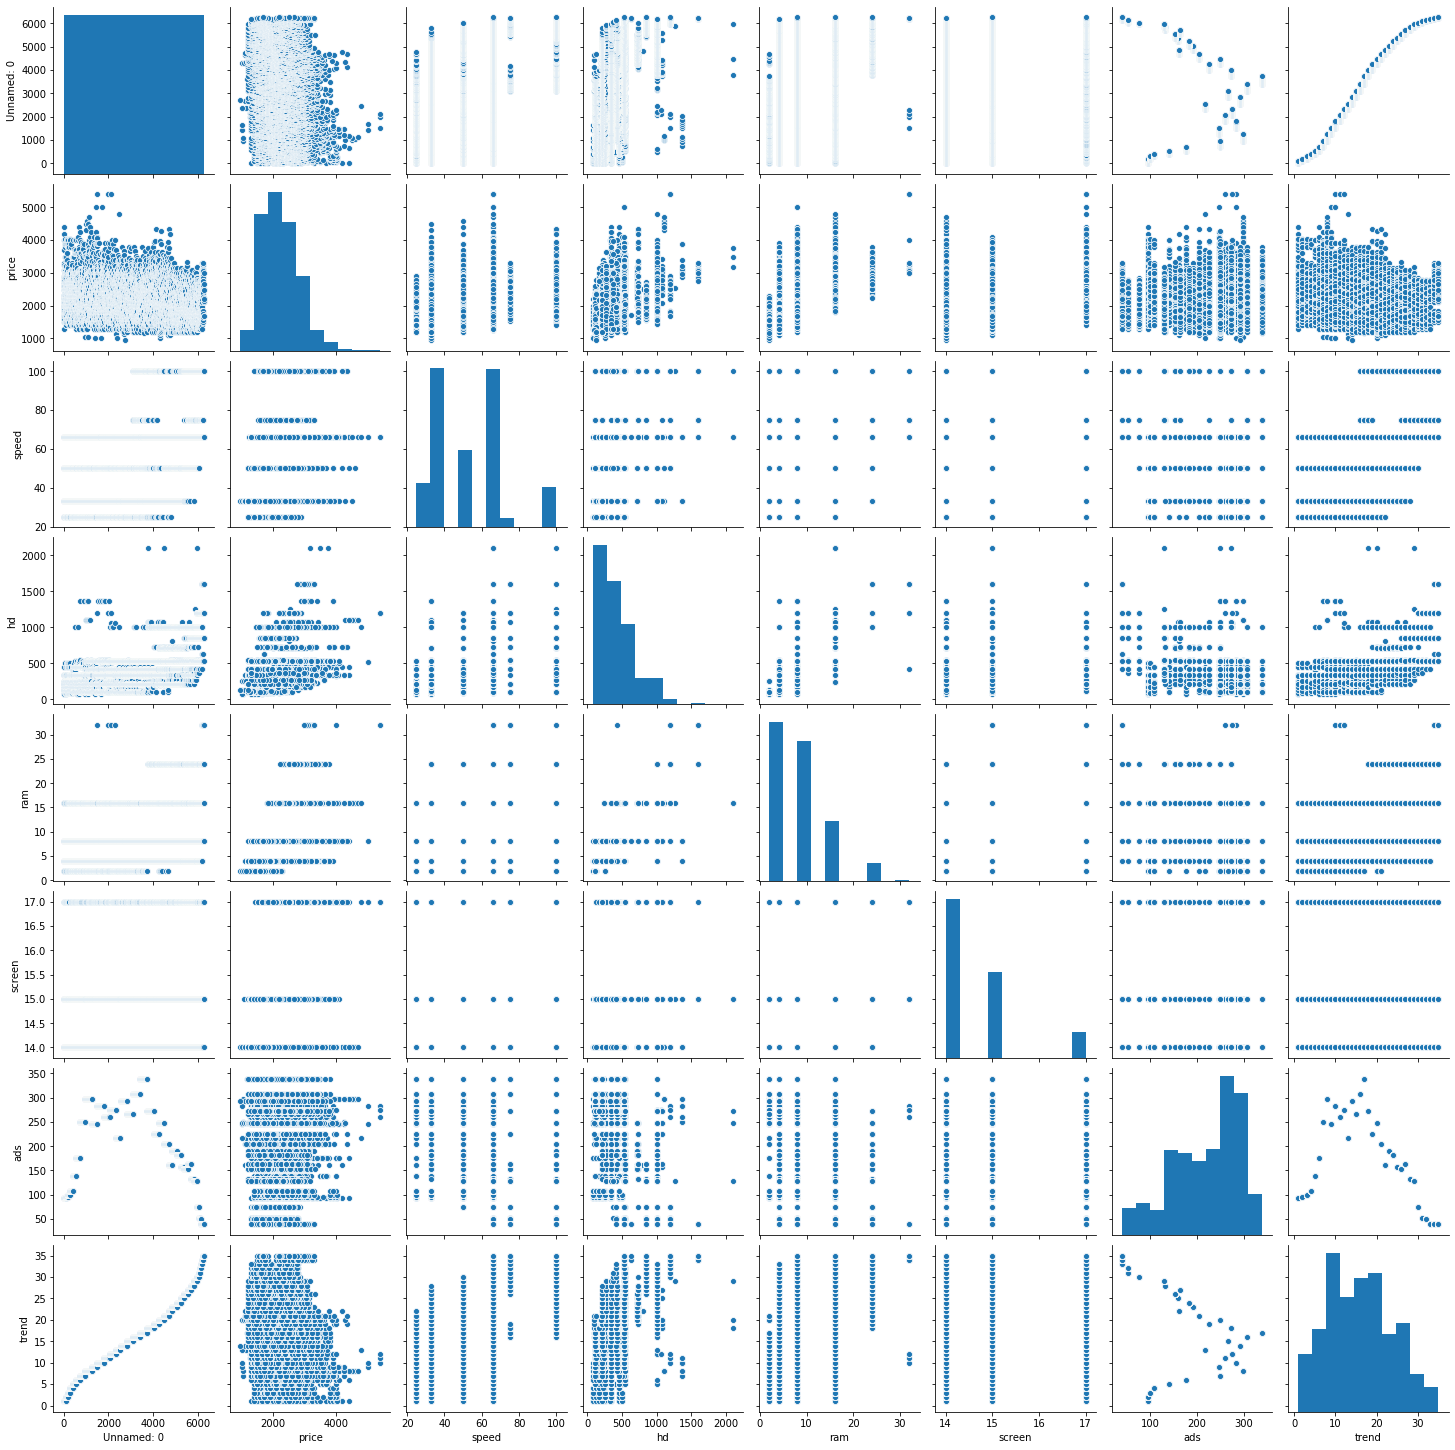

In [16]:
sns.pairplot(df) # we can see the features of each data likely 

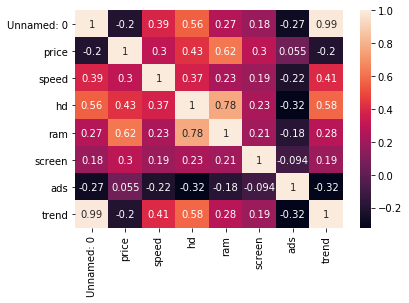

In [17]:
sns.heatmap(df.corr(),annot=True)

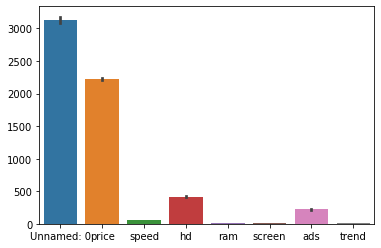

In [19]:
sns.barplot(data=df)# which data is quantitatively more

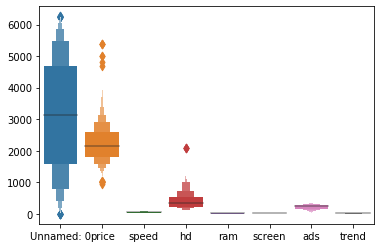

In [20]:
sns.boxenplot(data=df)

# Lets create our statistical model

In [21]:
df.columns

Index(['Unnamed: 0', 'price', 'speed', 'hd', 'ram', 'screen', 'cd', 'multi',
       'premium', 'ads', 'trend'],
      dtype='object')

In [22]:
import statsmodels.formula.api as smf

In [44]:
model = smf.ols('price ~ speed+hd+ram+screen+cd+multi+premium+ads+trend',data = df).fit() # created a linear model car 

In [24]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     2399.
Date:                Mon, 20 Jul 2020   Prob (F-statistic):               0.00
Time:                        09:09:18   Log-Likelihood:                -44039.
No. Observations:                6259   AIC:                         8.810e+04
Df Residuals:                    6249   BIC:                         8.817e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        307.9880     60.353      5.

In [25]:
from statsmodels.graphics.regressionplots import *

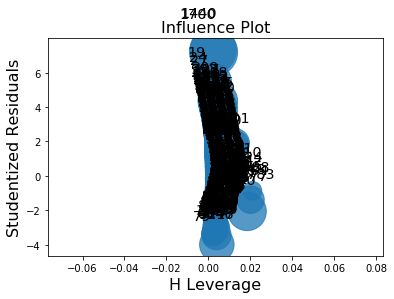

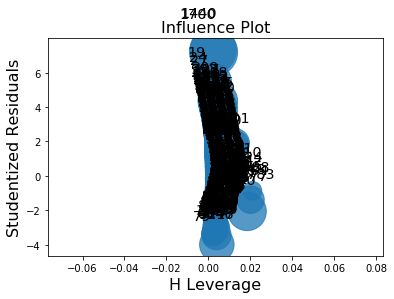

In [26]:
influence_plot(model)# influence plot

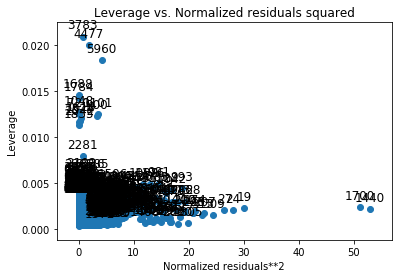

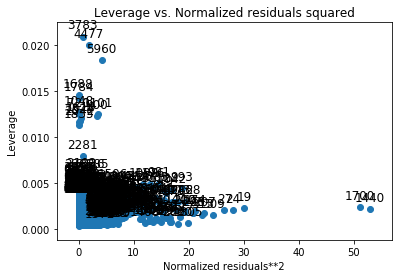

In [27]:
plot_leverage_resid2(model)# residual plot

In [30]:
df.columns

Index(['Unnamed: 0', 'price', 'speed', 'hd', 'ram', 'screen', 'cd', 'multi',
       'premium', 'ads', 'trend'],
      dtype='object')

In [31]:
df2 = df[['price', 'speed', 'hd', 'ram', 'screen','ads', 'trend']]

In [32]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df2))

In [41]:
threshold = 6
print(np.where(z > 6)) # we dignosed our outliers

(array([3783, 4477, 5960], dtype=int64), array([2, 2, 2], dtype=int64))


In [43]:
model1 = smf.ols('price ~ speed+hd+ram+screen+cd+multi+premium+ads+trend',data = df.drop([df.index[3788],df.index[4477],df.index[5960]])).fit() # created a linear model car #df.drop([df.index[48],df.index[49],df.index[46]])

In [46]:
print(model1.summary())# afte removing not significant improvement 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     2398.
Date:                Mon, 20 Jul 2020   Prob (F-statistic):               0.00
Time:                        09:24:50   Log-Likelihood:                -44017.
No. Observations:                6256   AIC:                         8.805e+04
Df Residuals:                    6246   BIC:                         8.812e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        308.1469     60.338      5.

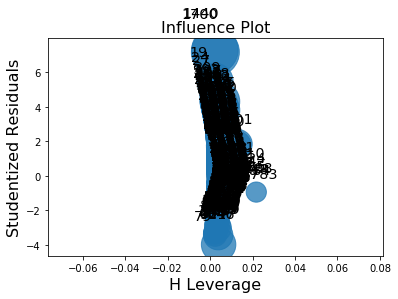

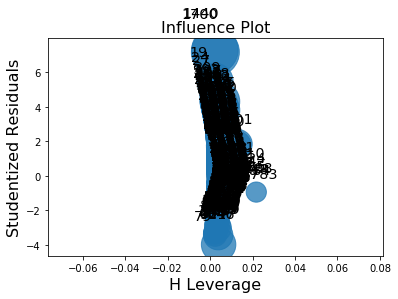

In [47]:
influence_plot(model1)

In [50]:
finalmodel = model1 # im having problem understing this condept but later try to understand similar concrpt